automaticPlots/4/Table_Diarreia é um problema recorrente em algum membro da família?.png
automaticPlots/5/Table_Qual é o material predominante da cobertura da casa?.png
automaticPlots/5/Table_Qual é o material predominante das paredes externas da casa?.png
automaticPlots/5/Table_Qual é o material predominante no piso interno da casa?.png
automaticPlots/5/Table_Algum(ns) dos moradores da residência deseja ter o seu próprio domícilio, diferente do atual?.png
automaticPlots/5/Table_Existe alguma plantação-horta no terreno do imóvel?.png
automaticPlots/5/Table_Para que fins são utilizados os produtos dessa plantação-horta?.png
automaticPlots/5/Table_Quantos cômodos há na casa?.png
automaticPlots/5/Table_Do total de cômodos, quantos são exclusivamente dormitórios?.png
automaticPlots/5/Table_Quantas camas ou lugares de dormir são utilizados na casa?.png
automaticPlots/5/Table_Nos últimos 12 meses, quantas vezes o terreno e-ou a casa inundou?.png
automaticPlots/5/Table_Qual a principal razão 

/home/walter/.pyenv/versions/3.10.4/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


97 gráficos gerados


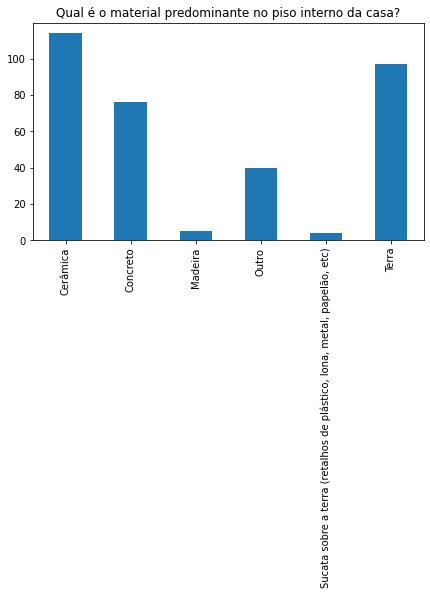

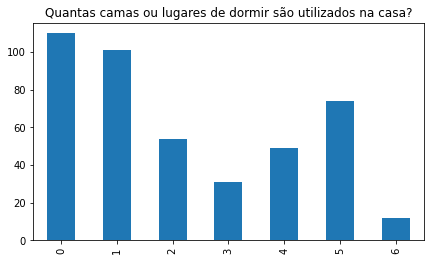

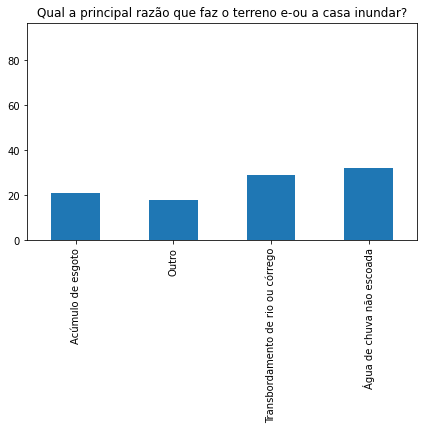

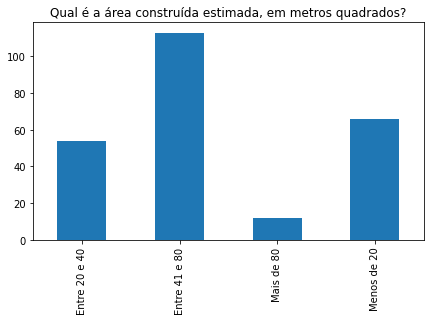

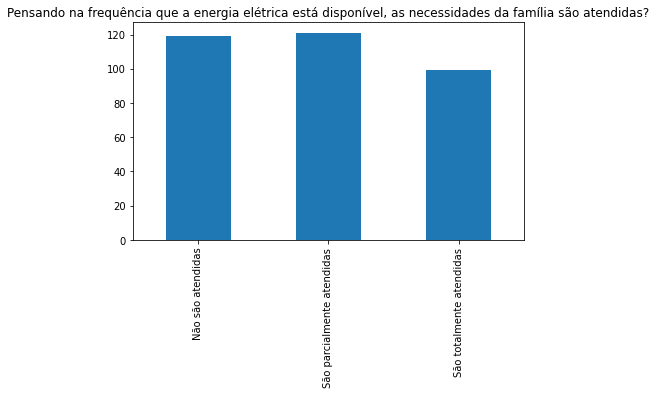

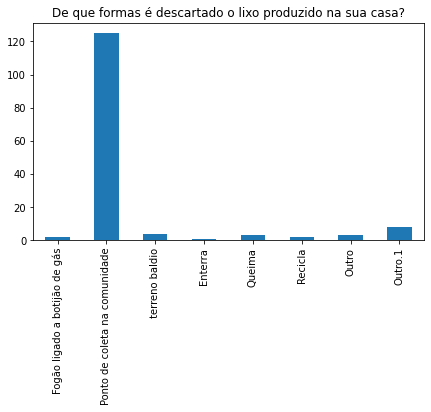

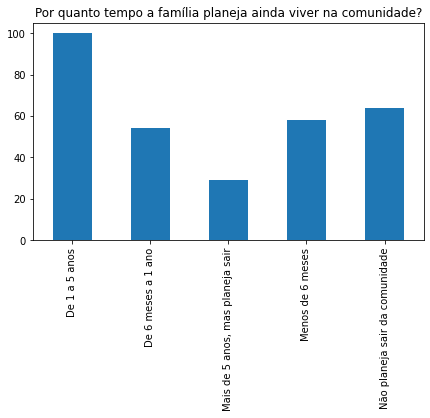

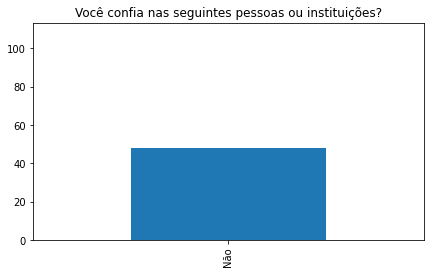

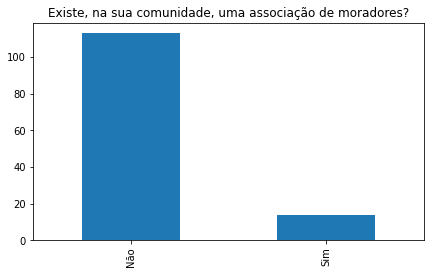

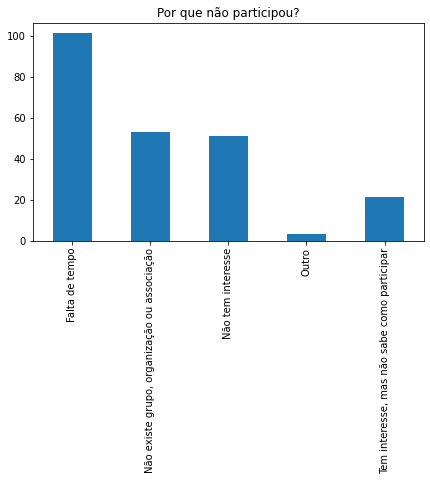

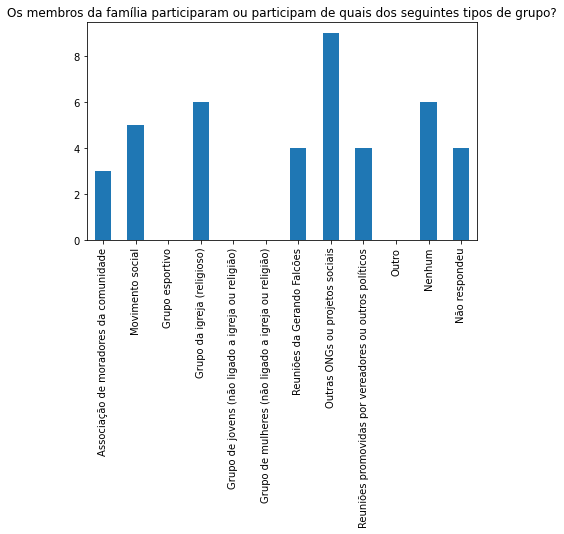

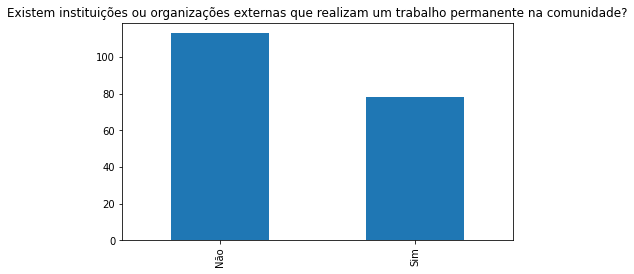

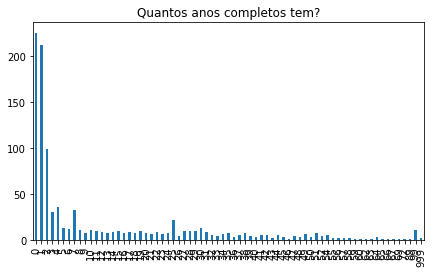

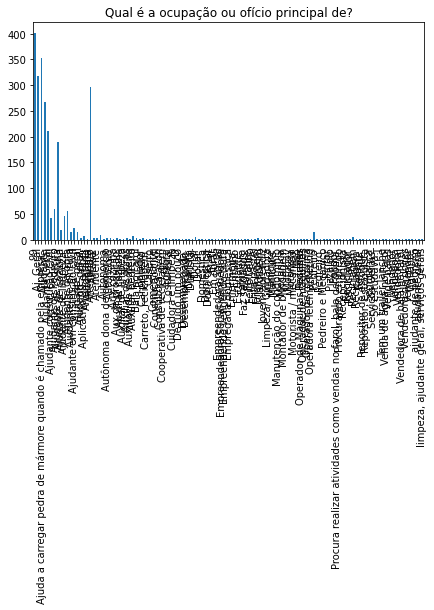

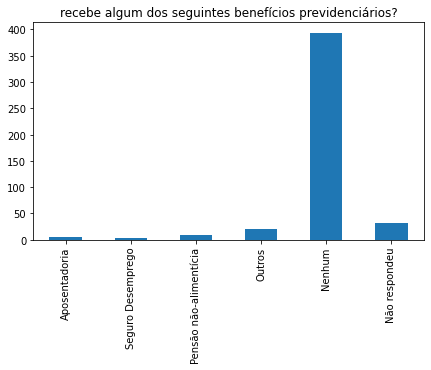

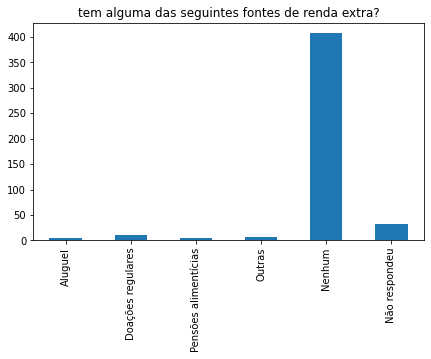

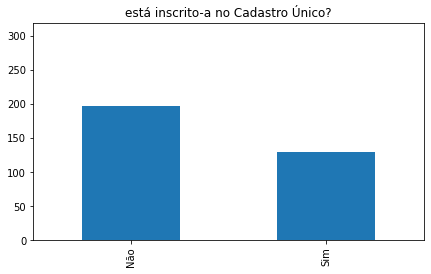

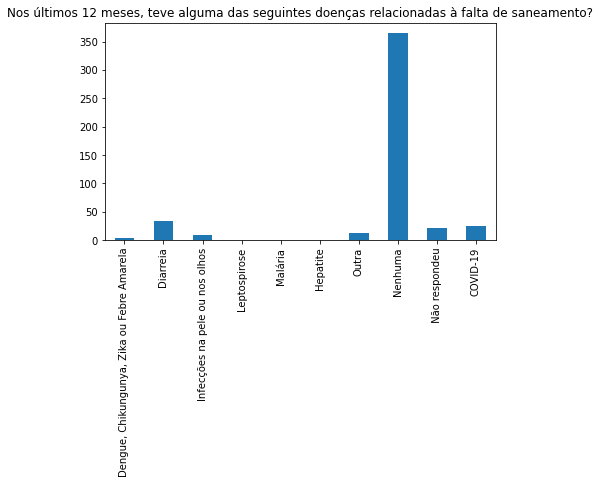

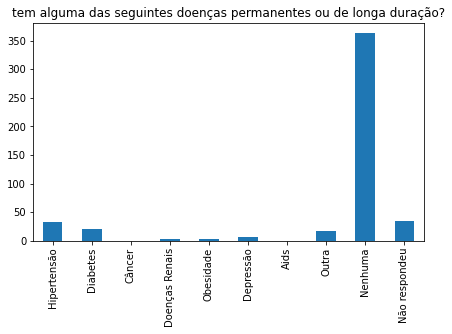

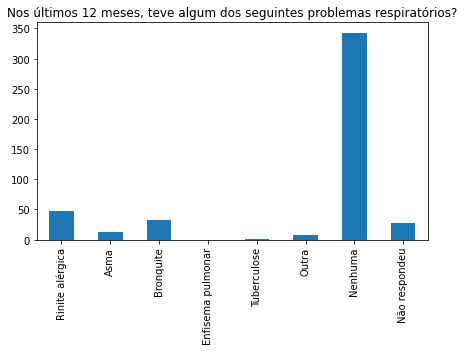

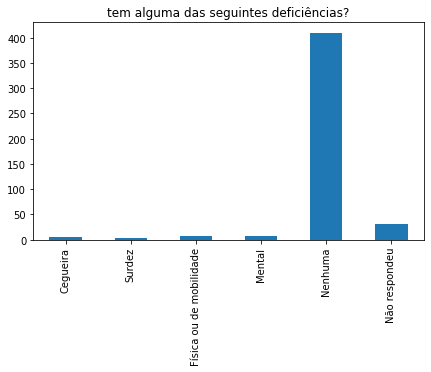

In [34]:
import pandas as pd
import os, glob
from pathlib import Path
import dataframe_image as dfi
counter = 0

def createDir(path):
  path = path[0:-1] #take out the last "/"
  if not os.path.isdir(f'./{path}'):
    currentPath = Path().absolute() #tentar './'
    dirPath = str(currentPath) + path
    os.makedirs(path)
  return

def takeOutNumber(string):
  try:
    withOutNumbers = string.split('. ')[1]
    return withOutNumbers
  except:
    return string

def takeOutVar(string):
  try:
    withOutVarPar1 = string.split(' ${')[0]
    withOutVarPar2 = string.split('}')[1]
    withOutVar = withOutVarPar1 + withOutVarPar2
    return withOutVar
  except:
    return string

def takeOutSideBars(string):
  try:
    string = string.replace('/', '-')
    return string
  except:
    return string

def getPathAndTitle(col):
  path = 'automaticPlots/'
  identifier = col.split(' ')[0]
  numbers = identifier.split('.')
  for number in numbers[0:-2]:
    path = path + f'{number}/'

  createDir(path)

  title = takeOutVar(col)
  title = takeOutNumber(title)
  title = takeOutSideBars(title)
  
  return path, title

def isQuestion(column):
  identifier = column.split(' ')[0]
  numbers = identifier.split('.')
  if len(numbers) <= 1: return False
  else: return True

def repeated(column, columns):
  #repeaeted column ends like .1 or .2
  if(column[-2] == '.'): return True
  index = columns.index(column)
  question = column.split('/')[0]
  if columns[index-1].__contains__(question):
    return True
  return False

def hasMultipleOptions(column, columns):
  index = columns.index(column)
  if columns[index+1].__contains__(column):# or columns[index-1].__contains__(column):
    return True
  
  return False


def makePlot(df, col, sheet):
  global counter
  path, title = getPathAndTitle(col)
  saveTable(df, path, "Table_"+title)
  try:
    nomeCol = 'Nome completo do/a morador/a que responderá e assinará a enquete:'
    teste = df[nomeCol]
    df = df[(df[nomeCol] != 'Teste app') & (df[nomeCol] != 'Teste 2') & (df[nomeCol] != 'Teste') & (df[col] != 'Nenhuma') & (df[col] != 'Nenhum') & (df[col] != 'Não sabe/Não respondeu') & (df[col] != 'Não sabe/ Não respondeu')][col].to_frame()
  except:
    df = df[(df[col] != 'Nenhuma') & (df[col] != 'Nenhum') & (df[col] != 'Não sabe/Não respondeu') & (df[col] != 'Não sabe/ Não respondeu')][col].to_frame()
  df = df[col].rename('').to_frame()
  col = ''
  respostas = df.groupby([col])[col].count()
  if respostas.size > 0:
    plot = respostas.plot.bar(title=title, figsize=(7,4))
    plot.figure.savefig(path+title, dpi=300, bbox_inches='tight', facecolor='white')
    counter+=1

def getTheColumnsWithOptions(column, columns):
  index = columns.index(column)
  options = []
  thereIsAnOption = True
  while thereIsAnOption:
    if columns[index+1].__contains__(column):
      option = columns[index+1].split('/')[-1]
      options.append(columns[index+1])
    else:
      thereIsAnOption = False
    index+=1
  return options

def getAnswerOfTheOption(columnsOptions, df):
  dfOfOptions = df[columnsOptions]
  return dfOfOptions.sum().to_frame()
  


def makePlotOfOptions(df, col, columns, sheet):
  global counter
  path, title = getPathAndTitle(col)
  columnsOptions = getTheColumnsWithOptions(col, columns)
  df = getAnswerOfTheOption(columnsOptions, df)
  df.rename(index=lambda s: s.split('/')[-1], inplace = True)
  plot = df.plot.bar(title = title, figsize=(7,4), legend=False)
  plot.figure.savefig(path+title, dpi=300, bbox_inches='tight', facecolor='white')
  counter+=1

def makePlotsOfSheet(excel, sheet):
  df = pd.read_excel(excel, sheet)
  columns = df.columns
  columns = columns.tolist()
  for column in columns:
    if not isQuestion(column) or repeated(column, columns):
      continue
    if hasMultipleOptions(column, columns):
      makePlotOfOptions(df, column, columns, sheet)
      continue

    makePlot(df, column, sheet)

def main():
  global counter
  excelPath = "./*.xlsx"
  xlsx = glob.glob(excelPath)
  excel = pd.ExcelFile(xlsx[0])
  sheets = excel.sheet_names

  for sheet in sheets:
    makePlotsOfSheet(excel, sheet)
  
  print(f"{counter} gráficos gerados")

def saveTable(df, path, title):
  print(path+title+'.png')
  if df.shape[0] < 50:
    dfi.export(df, path+title+'.png')

main()

- Ver os casos que não se tirou as colunas básicas
- realizar também as tabelas com valor e porcentagem (nào tirar valores default)

In [21]:
df = pd.DataFrame(columns = ['Alternativas', 'Respostas'])
df

,Alternativas,Respostas
